<a href="https://colab.research.google.com/github/vaishnavigogineni/Myntra_HackerRamp_DataAnalysis/blob/main/Myntra_HackerRamp_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = '/content/couture_codex_myntraHackerRamp - Sheet1 (1).csv'
df = pd.read_csv(file_path)
print(df.head())
df['FOLLOWER COUNT'] = df['FOLLOWER COUNT'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
df['BRAND NAME'] = df['BRAND NAME'].str.strip()
df['PRODUCT CATEGORIES'] = df['PRODUCT CATEGORIES'].str.strip()
df['SOCIAL MEDIA HANDLES'] = df['SOCIAL MEDIA HANDLES'].str.strip()
df['UNIQUE SELLING POINTS(USPs)'] = df['UNIQUE SELLING POINTS(USPs)'].str.strip()
df['CONTACT INFORMATION'] = df['CONTACT INFORMATION'].str.strip()

print(df.head())


        BRAND NAME        PRODUCT CATEGORIES SOCIAL MEDIA HANDLES  \
0      DiamondLady            Modern Dresses      @diamondlady.in   
1           Basata       Sustainable Fashion           @thebasata   
2    Bhavini Paris               Fusion Wear        @bhaviniparis   
3  Kaira by Nikita  Contemporary Ethnic Wear       @kairabynikita   
4         Shubhang  Trendy, Everyday Fashion       @shubhangindia   

  FOLLOWER COUNT                        UNIQUE SELLING POINTS(USPs)  \
0           229K             Western Wear with a Contemporary Twist   
1          52.4K  Sustainable fashion with a focus on eco-friend...   
2          67.6K  Fusion of Indian and Parisian styles, offering...   
3            53K  Contemporary ethnic wear with a modern twist, ...   
4           1.6K  Affordable fashion with trendy, stylish design...   

               CONTACT INFORMATION  
0                       8800225892  
1  customerservicebasata@gmail.com  
2            bhavini9728@gmail.com  
3         

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=["PRODUCT CATEGORIES", "UNIQUE SELLING POINTS(USPs)"])
df_encoded = df_encoded.drop(columns=['BRAND NAME', 'SOCIAL MEDIA HANDLES', 'CONTACT INFORMATION'])
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')
df_encoded = df_encoded.dropna()
X = df_encoded.drop(columns=['FOLLOWER COUNT'])
y = df_encoded['FOLLOWER COUNT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 19683958629.03224


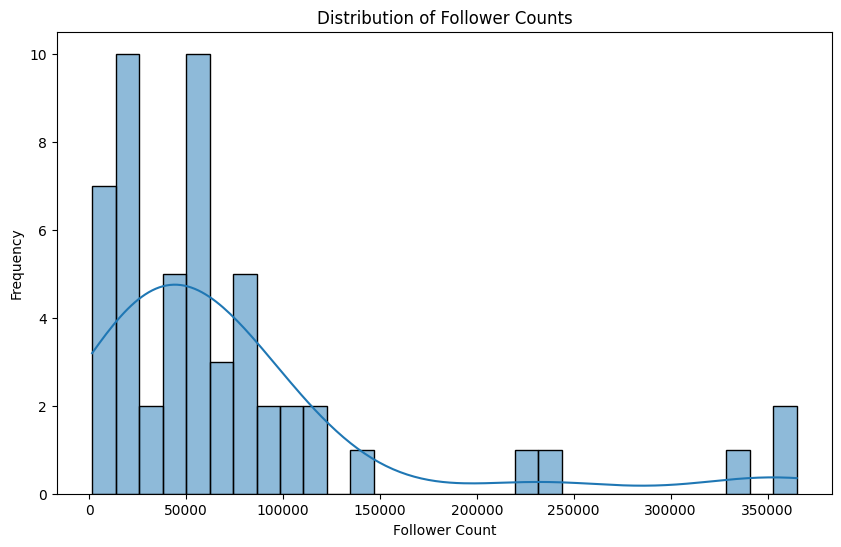

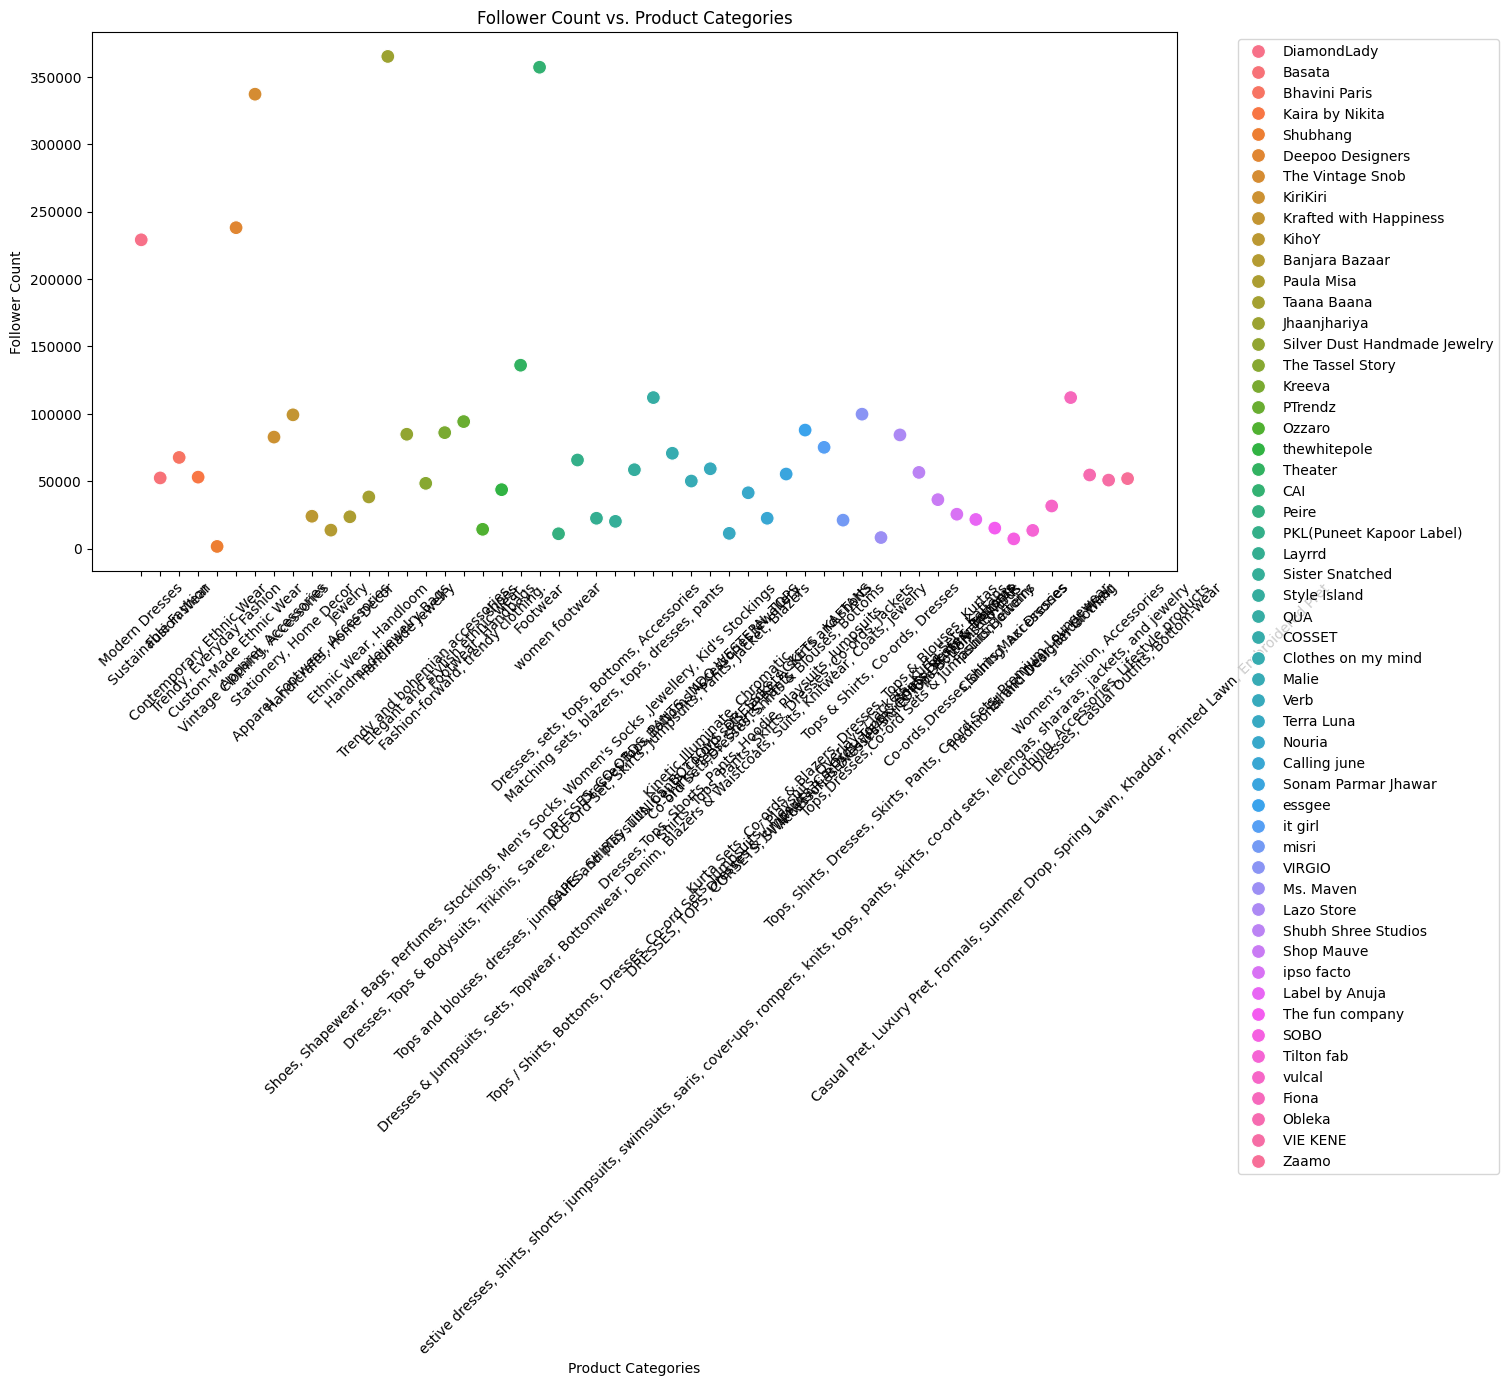

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['FOLLOWER COUNT'], bins=30, kde=True)
plt.title('Distribution of Follower Counts')
plt.xlabel('Follower Count')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='PRODUCT CATEGORIES', y='FOLLOWER COUNT', hue='BRAND NAME', s=100)
plt.title('Follower Count vs. Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Follower Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=["PRODUCT CATEGORIES", "UNIQUE SELLING POINTS(USPs)"])
df_encoded = df_encoded.drop(columns=['BRAND NAME', 'SOCIAL MEDIA HANDLES', 'CONTACT INFORMATION'])
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')
df_encoded = df_encoded.dropna()
X = df_encoded.drop(columns=['FOLLOWER COUNT'])
y = df_encoded['FOLLOWER COUNT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Model Training and Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} CV Mean Squared Error: {-cv_scores.mean()}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Test Mean Squared Error: {mse}")
    print(f"{name} Test R2 Score: {r2}")


Linear Regression CV Mean Squared Error: 16513683985.37951
Linear Regression Test Mean Squared Error: 14093602387.526007
Linear Regression Test R2 Score: -0.2419425811393543
Ridge Regression CV Mean Squared Error: 5733998870.942826
Ridge Regression Test Mean Squared Error: 12798512095.487352
Ridge Regression Test R2 Score: -0.12781790698744278
Lasso Regression CV Mean Squared Error: 6070693171.649752
Lasso Regression Test Mean Squared Error: 13628535590.598259
Lasso Regression Test R2 Score: -0.2009604218377785


Polynomial Regression Test Mean Squared Error: 13670126227.467201
Polynomial Regression Test R2 Score: -0.20462543107274622


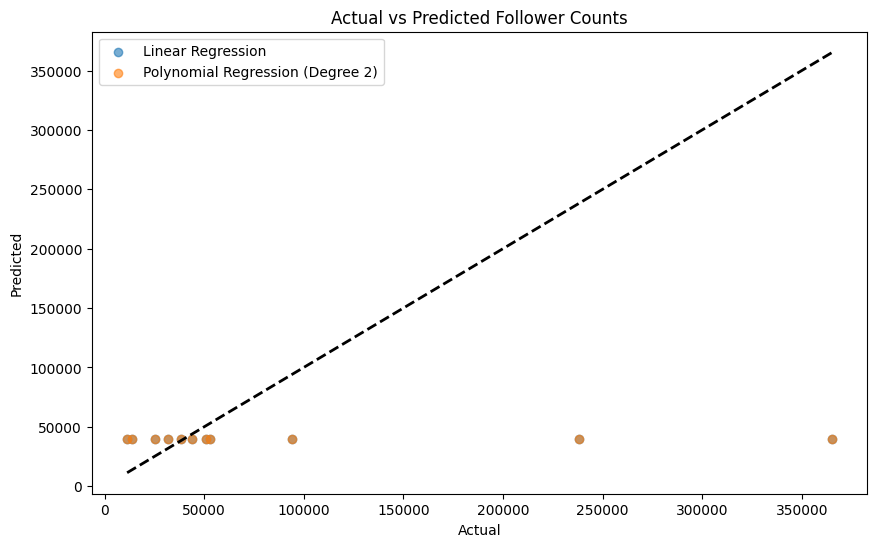

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

X_test_poly = poly.transform(X_test_scaled)
y_poly_pred = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)
print(f"Polynomial Regression Test Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression Test R2 Score: {r2_poly}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Linear Regression", alpha=0.6)
plt.scatter(y_test, y_poly_pred, label="Polynomial Regression (Degree 2)", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Follower Counts')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))


model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Absolute Error: {mae}")
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Neural Network Test Mean Squared Error: {mse}")
print(f"Neural Network Test R2 Score: {r2}")


Epoch 1/100
2/2 [==============================] - 1s 240ms/step - loss: 10418364416.0000 - mae: 70176.9453 - val_loss: 19042525184.0000 - val_mae: 87718.2891
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 10418369536.0000 - mae: 70176.8828 - val_loss: 19042508800.0000 - val_mae: 87718.2031
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 10418365440.0000 - mae: 70176.7188 - val_loss: 19042494464.0000 - val_mae: 87718.1250
Epoch 4/100
2/2 [==============================] - 0s 53ms/step - loss: 10418285568.0000 - mae: 70176.1875 - val_loss: 19042482176.0000 - val_mae: 87718.0469
Epoch 5/100
2/2 [==============================] - 0s 40ms/step - loss: 10418311168.0000 - mae: 70176.4453 - val_loss: 19042467840.0000 - val_mae: 87717.9688
Epoch 6/100
2/2 [==============================] - 0s 36ms/step - loss: 10418204672.0000 - mae: 70176.0312 - val_loss: 19042455552.0000 - val_mae: 87717.8828
Epoch 7/100
2/2 [==============================] - 

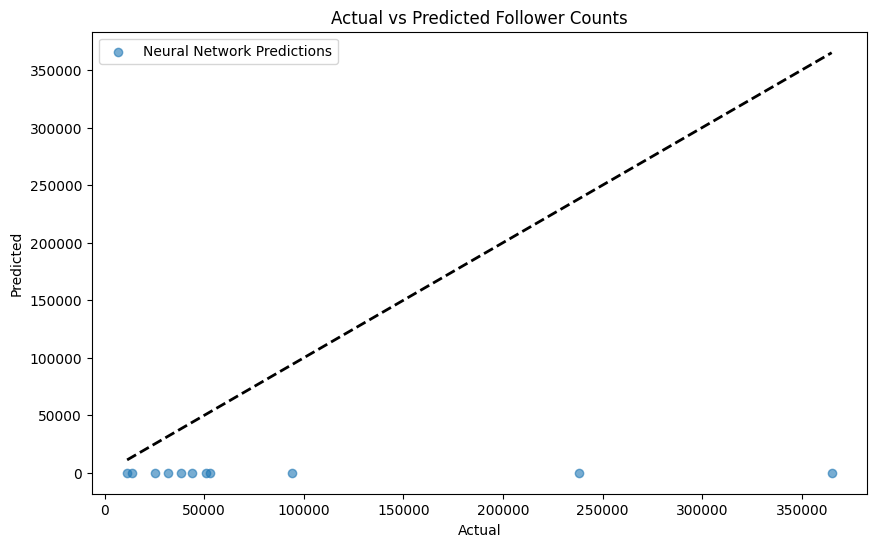

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Neural Network Predictions", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Follower Counts')
plt.legend()
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

ridge_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_params = {'alpha': [0.01, 0.1, 1.0]}
ridge = Ridge()
lasso = Lasso()

# GridSearch for Ridge
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)
best_ridge = ridge_grid.best_estimator_
print(f"Best Ridge parameters: {ridge_grid.best_params_}")

# GridSearch for Lasso
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)
best_lasso = lasso_grid.best_estimator_
print(f"Best Lasso parameters: {lasso_grid.best_params_}")

for name, model in [("Ridge Regression", best_ridge), ("Lasso Regression", best_lasso)]:
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Test Mean Squared Error: {mse}")
    print(f"{name} Test R2 Score: {r2}")

Best Ridge parameters: {'alpha': 10.0}
Best Lasso parameters: {'alpha': 0.1}
Ridge Regression Test Mean Squared Error: 11865059754.718866
Ridge Regression Test R2 Score: -0.045561137029844545
Lasso Regression Test Mean Squared Error: 13628535590.598259
Lasso Regression Test R2 Score: -0.2009604218377785


In [16]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ensemble = VotingRegressor(estimators=[('lr', lr), ('ridge', ridge), ('lasso', lasso)])
ensemble.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble.predict(X_test_scaled)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print(f"Ensemble Test Mean Squared Error: {mse_ensemble}")
print(f"Ensemble Test R2 Score: {r2_ensemble}")


Ensemble Test Mean Squared Error: 13483180061.548225
Ensemble Test R2 Score: -0.18815154473400475


In [ ]:
#LINK FOR THIS COLAB CODE: https://colab.research.google.com/drive/1VlzSkT6I2cnKWC6yo8_jL2GPN1CrtmKa?usp=sharing